In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torch import nn

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [3]:
from text_recognizer.datasets import IamLinesDataset, AddTokens

In [4]:
dataset = IamLinesDataset(train=False, pad_token="_")
dataset.load_or_generate_data()
print(dataset)

IAM Lines Dataset
Number classes: 80
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}
Data: (1861, 28, 952)
Targets: (1861, 97)



In [5]:
dataset.input_shape

(28, 952)

In [6]:
dataset.output_shape

(97, 80)

In [7]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join([dataset.mapper(int(i)) for i in y])

convert_y_label_to_string(dataset.targets[0])

'He rose from his breakfast-nook bench____________________________________________________________'

drawing-in great breaths that____________________________________________________________________
became great sighs of ecstacy.___________________________________________________________________
"They have come!" he said reverently, gripping his_______________________________________________
hands together between his knees and leaning_____________________________________________________
forward. "Isn't it a glorious thing! Long awaited________________________________________________
transcendent event, the exalted desire of all____________________________________________________
mankind through all ages! The Kingdom of the_____________________________________________________
Mind is at hand!" He turned beaming eyes_________________________________________________________
upward and shook his head slowly from____________________________________________________________
A superfluous precaution for there was no other car______________________________________________


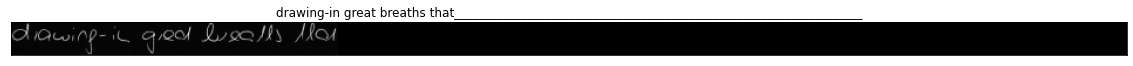

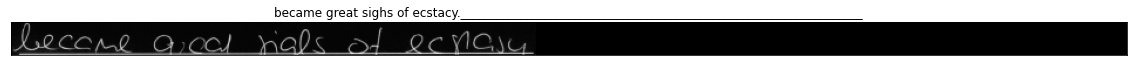

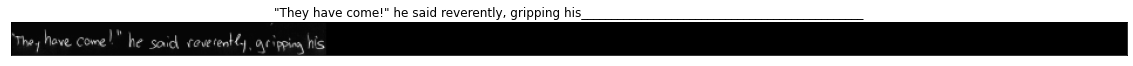

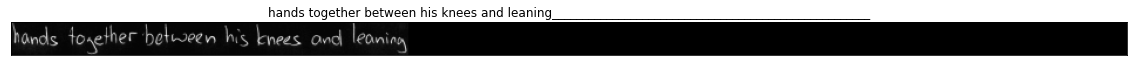

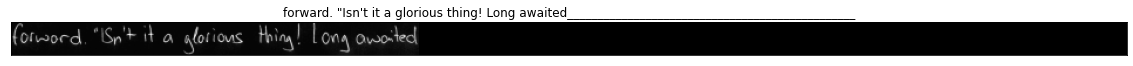

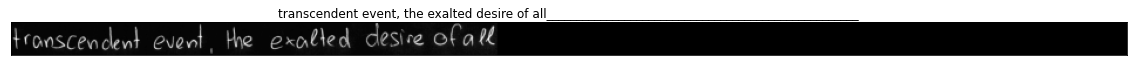

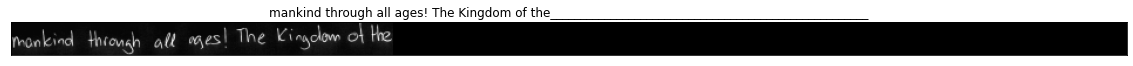

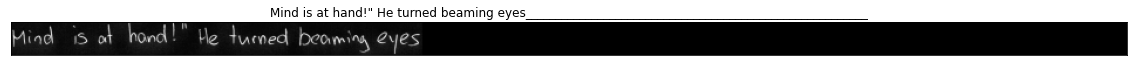

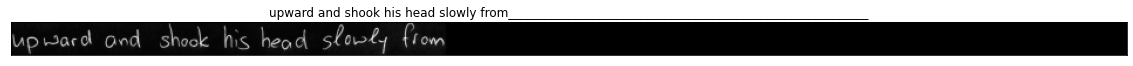

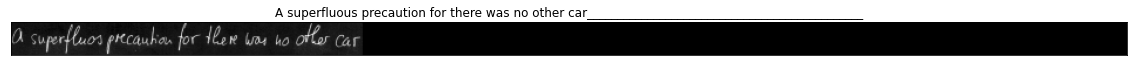

In [8]:
for i in range(10, 20):
    plt.figure(figsize=(20, 20))
    plt.xticks([])
    plt.yticks([])
    data, target = dataset[i]
    sentence = convert_y_label_to_string(target, dataset) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(data.squeeze(0).numpy(), cmap='gray')

In [9]:
data, target = dataset[12]
sentence = convert_y_label_to_string(target) 

In [10]:
target.shape

torch.Size([97])

In [84]:
h, w, s = 28, 5, 5

In [85]:
from einops.layers.torch import Rearrange
slide = nn.Sequential(nn.Unfold(kernel_size=(h, w), stride=(1, s)), Rearrange("b (c h w) t -> b t c h w", h=h, w=w, c=1))

In [86]:
28 * 5

140

In [87]:
patches = slide(data.unsqueeze(0))

"They have come!" he said reverently, gripping his_______________________________________________


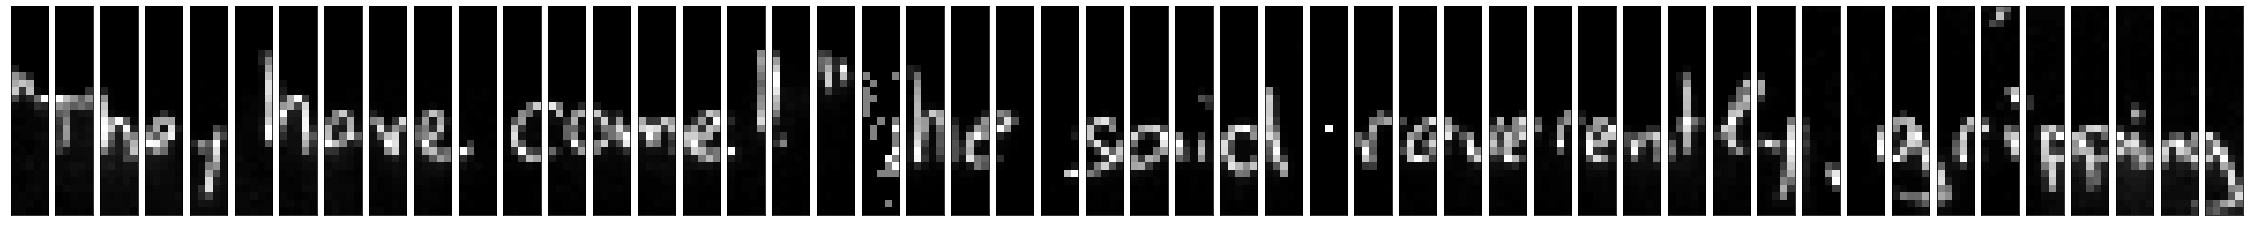

In [88]:
# remove batch size
n = 50
patches = patches.squeeze(0)
fig = plt.figure(figsize=(40, 40))
print(sentence)
for i in range(n):
    ax = fig.add_subplot(1, n, i + 1)
    ax.imshow(patches[i].squeeze(0), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

In [89]:
patches.shape

torch.Size([190, 1, 28, 5])

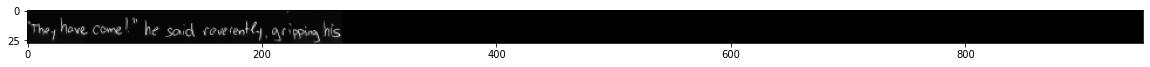

In [16]:
plt.figure(figsize=(20, 20))
plt.imshow(data.squeeze(0).numpy(), cmap='gray')

In [17]:
from text_recognizer.datasets.transforms import Compose, AddTokens

In [18]:
target_transform = Compose([torch.tensor, AddTokens(init_token="<sos>", eos_token="<eos>")])

TypeError: __init__() missing 1 required positional argument: 'pad_token'

In [ ]:
dataset = IamLinesDataset(train=True, init_token="<sos>", pad_token="_", eos_token="<eos>", target_transform=target_transform)
dataset.load_or_generate_data()
print(dataset)

In [ ]:
data, target = dataset[0]
sentence = convert_y_label_to_string(target, dataset) 

([], [])

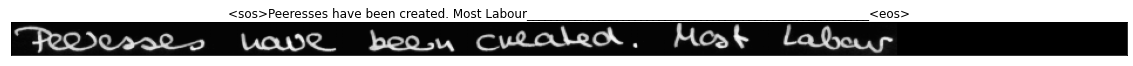

In [66]:
plt.figure(figsize=(20, 20))
plt.title(sentence)
plt.imshow(data.squeeze(0).numpy(), cmap='gray')
plt.xticks([])
plt.yticks([])

In [176]:
from text_recognizer.networks import VisionTransformer

In [191]:
tt = Transformer(3, 3, 512, 8, 2048, 0.1)

In [193]:
vt = VisionTransformer(6, 6, 256, 82, 8, 118, 512, 256, 0.1, 79, (28, 16), (1, 8), "gelu")

In [169]:
from torchsummary import summary

In [194]:
vt

VisionTransformer(
  (slidning_window): Sequential(
    (0): Unfold(kernel_size=(28, 16), dilation=1, padding=0, stride=(1, 8))
    (1): Rearrange('b (c h w) t -> b t (c h w)', h=28, w=16, c=1)
  )
  (character_embedding): Embedding(82, 256)
  (position_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (linear_projection): Linear(in_features=448, out_features=256, bias=True)
  (transformer): Transformer(
    (encoder): Encoder(
      (layers): ModuleList(
        (0): EncoderLayer(
          (self_attention): MultiHeadAttention(
            (fc_q): Linear(in_features=256, out_features=256, bias=False)
            (fc_k): Linear(in_features=256, out_features=256, bias=False)
            (fc_v): Linear(in_features=256, out_features=256, bias=False)
            (fc_out): Linear(in_features=256, out_features=256, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (cnn): _ConvolutionalLayer(
            (layer): Sequential(


In [214]:
summary(vt, [(1, 28, 952), (97,)], device="cpu")

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 118, 448]            --
|    └─Unfold: 2-1                       [-1, 448, 118]            --
|    └─Rearrange: 2-2                    [-1, 118, 448]            --
├─Linear: 1-2                            [-1, 118, 256]            114,944
├─PositionalEncoding: 1-3                [-1, 118, 256]            --
|    └─Dropout: 2-3                      [-1, 118, 256]            --
├─Embedding: 1-4                         [-1, 97, 256]             20,992
├─PositionalEncoding: 1-5                [-1, 97, 256]             --
|    └─Dropout: 2-4                      [-1, 97, 256]             --
├─Transformer: 1-6                       [-1, 97, 256]             --
|    └─Encoder: 2-5                      [-1, 118, 256]            --
|    └─Decoder: 2-6                      [-1, 97, 256]             --
├─Sequential: 1-7                        [-1, 97, 82]              --
|    └

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 118, 448]            --
|    └─Unfold: 2-1                       [-1, 448, 118]            --
|    └─Rearrange: 2-2                    [-1, 118, 448]            --
├─Linear: 1-2                            [-1, 118, 256]            114,944
├─PositionalEncoding: 1-3                [-1, 118, 256]            --
|    └─Dropout: 2-3                      [-1, 118, 256]            --
├─Embedding: 1-4                         [-1, 97, 256]             20,992
├─PositionalEncoding: 1-5                [-1, 97, 256]             --
|    └─Dropout: 2-4                      [-1, 97, 256]             --
├─Transformer: 1-6                       [-1, 97, 256]             --
|    └─Encoder: 2-5                      [-1, 118, 256]            --
|    └─Decoder: 2-6                      [-1, 97, 256]             --
├─Sequential: 1-7                        [-1, 97, 82]              --
|    └

In [195]:
x = vt.preprocess_input(data)

In [196]:
x.shape

torch.Size([1, 118, 256])

In [197]:
x = vt.encoder(x)

In [201]:
trg = torch.tensor([10, 62, 22, 24, 31, 14, 62, 55, 50, 62, 54, 55, 50, 51, 62, 22, 53, 74,
        62, 16, 36, 44, 55, 54, 46, 40, 47, 47, 62, 41, 53, 50, 48, 79, 79, 79,
        79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
        79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
        79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
        79, 79, 79, 79, 79, 79, 79])[None, :]

In [204]:
t, tm = vt.preprocess_target(trg)

In [209]:
vt.eval()

VisionTransformer(
  (slidning_window): Sequential(
    (0): Unfold(kernel_size=(28, 16), dilation=1, padding=0, stride=(1, 8))
    (1): Rearrange('b (c h w) t -> b t (c h w)', h=28, w=16, c=1)
  )
  (character_embedding): Embedding(82, 256)
  (position_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (linear_projection): Linear(in_features=448, out_features=256, bias=True)
  (transformer): Transformer(
    (encoder): Encoder(
      (layers): ModuleList(
        (0): EncoderLayer(
          (self_attention): MultiHeadAttention(
            (fc_q): Linear(in_features=256, out_features=256, bias=False)
            (fc_k): Linear(in_features=256, out_features=256, bias=False)
            (fc_v): Linear(in_features=256, out_features=256, bias=False)
            (fc_out): Linear(in_features=256, out_features=256, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (cnn): _ConvolutionalLayer(
            (layer): Sequential(


In [ ]:
t

In [211]:
vt.decoder(t, x, tm)

tensor([[[-0.4344,  0.4939,  0.0382,  ..., -0.0808, -0.0290,  0.4399],
         [-0.4350,  0.5146,  0.0356,  ..., -0.0634, -0.0289,  0.4271],
         [-0.4303,  0.5245,  0.0435,  ..., -0.0755, -0.0267,  0.4240],
         ...,
         [-0.4477,  0.5377,  0.0596,  ..., -0.0866, -0.0283,  0.4457],
         [-0.4475,  0.5435,  0.0606,  ..., -0.0900, -0.0293,  0.4440],
         [-0.4488,  0.5476,  0.0689,  ..., -0.0914, -0.0276,  0.4411]]],
       grad_fn=<AddBackward0>)

In [213]:
vt(data, trg)

tensor([[[-0.4179,  0.4755,  0.0407,  ..., -0.0609, -0.0870,  0.4562],
         [-0.4262,  0.4845,  0.0361,  ..., -0.0497, -0.0847,  0.4459],
         [-0.4237,  0.4900,  0.0409,  ..., -0.0573, -0.0812,  0.4434],
         ...,
         [-0.4477,  0.5053,  0.0394,  ..., -0.0489, -0.0815,  0.4589],
         [-0.4469,  0.5069,  0.0407,  ..., -0.0500, -0.0808,  0.4573],
         [-0.4464,  0.5079,  0.0416,  ..., -0.0510, -0.0801,  0.4570]]],
       grad_fn=<AddBackward0>)